In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crime=pd.read_csv("crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [4]:
from sklearn.preprocessing import StandardScaler
x=crime.iloc[:,1:].values
#FEATURE SCALING
sc_x = StandardScaler()
x =sc_x.fit_transform(x)

In [5]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

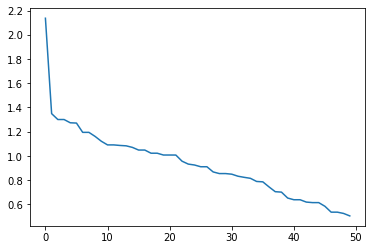

In [6]:
from sklearn.neighbors import NearestNeighbors
ns = 3
nbrs = NearestNeighbors(n_neighbors=ns).fit(x)
distances, indices = nbrs.kneighbors(x)
distanceDec = sorted(distances[:,ns-1], reverse=True)
plt.plot(indices[:,0], distanceDec)


In [7]:
# distance value each point
print(distanceDec)

[2.136971344643597, 1.3492627276449263, 1.300691141549338, 1.300691141549338, 1.2737434843867874, 1.2714006712452572, 1.1946964016190045, 1.1946964016190045, 1.1611009144493558, 1.1212514637907172, 1.091064514746985, 1.091064514746985, 1.0865316609298954, 1.0834107590553272, 1.0705701702968808, 1.0485942788183757, 1.0485942788183757, 1.0225018692038894, 1.0225018692038894, 1.0075434347882106, 1.0075434347882106, 1.0072266290663898, 0.9564324916279576, 0.9325621570829024, 0.9250945050118186, 0.9107342425159917, 0.9107342425159917, 0.8679780563698087, 0.8543564542245922, 0.8543564542245922, 0.849284665487476, 0.8325022270723199, 0.8232815438483984, 0.8152224355390763, 0.7892312284255611, 0.7860298248284557, 0.7441253749799489, 0.7047147287128988, 0.7011132598462632, 0.6522714208221354, 0.6382213052451658, 0.6382213052451658, 0.6189453256417937, 0.6145176824765823, 0.6145176824765823, 0.5841181249165429, 0.5357100654046991, 0.5357100654046991, 0.5251508316983605, 0.504669255247686]


In [8]:
print(distances)

[[0.         0.78006247 0.84928467]
 [0.         2.07898369 2.13697134]
 [0.         1.0482199  1.08341076]
 [0.         1.0013278  1.00722663]
 [0.         1.20897691 1.30069114]
 [0.         1.24886253 1.30069114]
 [0.         0.88100359 0.95643249]
 [0.         1.19227586 1.27140067]
 [0.         1.30974334 1.34926273]
 [0.         0.86797806 1.02250187]
 [0.         1.08184506 1.16110091]
 [0.         0.75913104 0.81522244]
 [0.         0.35377437 0.83250223]
 [0.         0.43312429 0.53571007]
 [0.         0.2079438  0.63822131]
 [0.         0.43312429 0.52515083]
 [0.         0.8610239  1.07057017]
 [0.         0.78006247 0.86797806]
 [0.         0.50466926 0.65227142]
 [0.         0.54082482 1.09106451]
 [0.         0.80586349 0.91073424]
 [0.         0.58411812 1.09106451]
 [0.         0.49909939 0.61451768]
 [0.         0.79455301 1.1946964 ]
 [0.         0.98866758 1.00754343]
 [0.         0.74649625 0.82328154]
 [0.         0.53326883 0.61451768]
 [0.         1.20897691 1.27

In [9]:
print(indices)

[[ 0 17 41]
 [ 1 30 21]
 [ 2 30 31]
 [ 3 49 45]
 [ 4 27  5]
 [ 5 21  4]
 [ 6 37 20]
 [ 7 35 49]
 [ 8 30 21]
 [ 9 17 41]
 [10 43 34]
 [11 26 40]
 [12 31 42]
 [13 15 35]
 [14 28 48]
 [15 13 35]
 [16 25  3]
 [17  0  9]
 [18 28 14]
 [19 30 21]
 [20 29 43]
 [21 30 19]
 [22 48 26]
 [23 39 32]
 [24 45 36]
 [25 26 49]
 [26 15 22]
 [27  4 21]
 [28 14 18]
 [29 20 34]
 [30 19 21]
 [31 12 42]
 [32 39 23]
 [33 18 28]
 [34 35 13]
 [35 15 13]
 [36 46 24]
 [37 15 34]
 [38 20  6]
 [39 23  0]
 [40 47 18]
 [41  0  9]
 [42 12 31]
 [43 46 20]
 [44 33 47]
 [45 35 13]
 [46 36 43]
 [47 40 44]
 [48 22 14]
 [49 45 35]]


In [10]:
# distances in use for eps value
#model building
model= DBSCAN(eps=1.1,min_samples= 3).fit(x)
model

DBSCAN(eps=1.1, min_samples=3)

In [11]:
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
labels = model.labels_

In [12]:
print(labels)

[ 0 -1  1  2 -1 -1  2 -1 -1  0  2  2  1  2  2  2  2  0  2  1  2  1  2  0
  2  2  2 -1  2  2  1  1  0  2  2  2  2  2  2  0  2  0  1  2  2  2  2  2
  2  2]


In [13]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 6


In [14]:
crime['cluster']=model.labels_
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,0


In [15]:
crime.cluster.value_counts()

 2    30
 1     7
 0     7
-1     6
Name: cluster, dtype: int64

In [16]:
# -1 cluster data is noise point 
crime_1 = crime.groupby('cluster').agg('mean')
crime_1

,Murder,Assault,UrbanPop,Rape
cluster,,,,
-1,10.066667,261.333333,75.000000,36.250000
0,14.671429,251.285714,54.285714,21.685714
1,11.014286,262.571429,77.142857,28.800000
2,4.973333,112.433333,63.566667,16.356667


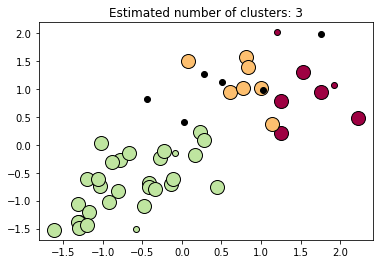

In [17]:
import matplotlib.pyplot as plt
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

# best eps = 1.1 and simple_size = 3 best for this data set